#### The Pulsar Classification Problem
* In order to classify a data sample as a pulsar or not a pulsar, we need to be able to extract some information on the data sample that can characterise its class. The individual bursts of emission from a pulsar (i.e. the pulses) do not have a constant shape or amplitude, so individually they’re not very useful for uniquely identifying a pulsar.

## Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

C:\Users\seema.patil03\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Step 2: Data Inspection

In [2]:
#importing data into a pandas DataFrame
df =pd.read_csv('HTRU_2.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


 * Because the individual pulses are all different, astronomers stack them up and create an average integrated pulse profile to characterise a particular pulsar:

* Additionally the pulse will arrive at different times across different radio frequencies. The delay from frequency to frequency is caused by the ionised inter-stellar medium and is known as the dispersion. It looks like this:



* Astronomers fit for the shape of the delay in order to compensate for its effect, but there’s always an uncertainty associated with the fit. That is expressed in the DM-SNR (“dispersion-measure-signal-to-noise-ratio”) curve, which looks like this:



* When you put these two curves together it means that for each pulsar candidate there are eight numerical characteristic features that can be extracted as standard: four from the integrated pulse profile and four from the DM-SNR curve:



In [4]:
df.shape

(17898, 9)

* Dataset has 17898 rows and 9 columns including features and labels

In [5]:
col_names=['Mean_IP', 'SD_IP', 'Excess kurtosis_IP', 'Skewness_IP','Mean_DM-SNR','SD_DM-SNR','Excess kurtosis_DM-SNR','Skewness_DM-SNR','Class'] 
df = pd.read_csv('HTRU_2.csv', names=col_names)
df.head()

,Mean_IP,SD_IP,Excess kurtosis_IP,Skewness_IP,Mean_DM-SNR,SD_DM-SNR,Excess kurtosis_DM-SNR,Skewness_DM-SNR,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
#df = pd.read_csv('HTRU_2.csv', names=['Mean_IP', 'Standard deviation_IP', 'Excess kurtosis_IP', 'Skewness_IP','Mean_DM-SNR','Standard deviation_DM-SNR','Excess kurtosis_DM-SNR','Skewness_DM-SNR','Class'], header=None)
#df.head()

In [7]:
#ratio of null values
df.isnull().sum()/df.shape[0] *100

Mean_IP                   0.0
SD_IP                     0.0
Excess kurtosis_IP        0.0
Skewness_IP               0.0
Mean_DM-SNR               0.0
SD_DM-SNR                 0.0
Excess kurtosis_DM-SNR    0.0
Skewness_DM-SNR           0.0
Class                     0.0
dtype: float64

* Since there are no null values in any of the columns, no imputation is needed. We will now check the datatypes of the columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Mean_IP                 17898 non-null  float64
 1   SD_IP                   17898 non-null  float64
 2   Excess kurtosis_IP      17898 non-null  float64
 3   Skewness_IP             17898 non-null  float64
 4   Mean_DM-SNR             17898 non-null  float64
 5   SD_DM-SNR               17898 non-null  float64
 6   Excess kurtosis_DM-SNR  17898 non-null  float64
 7   Skewness_DM-SNR         17898 non-null  float64
 8   Class                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


* All the columns are already in float64 format and can be directly fed to the algorithm. Thus no type conversions are needed.

##### Check for 5 point summary

In [9]:
df.describe()

,Mean_IP,SD_IP,Excess kurtosis_IP,Skewness_IP,Mean_DM-SNR,SD_DM-SNR,Excess kurtosis_DM-SNR,Skewness_DM-SNR,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


## Step 3: Exploratory Data Analysis

In [10]:
df.corr().style.background_gradient(cmap="Blues")

,Mean_IP,SD_IP,Excess kurtosis_IP,Skewness_IP,Mean_DM-SNR,SD_DM-SNR,Excess kurtosis_DM-SNR,Skewness_DM-SNR,Class
Mean_IP,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
SD_IP,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis_IP,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness_IP,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean_DM-SNR,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
SD_DM-SNR,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis_DM-SNR,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness_DM-SNR,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
Class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


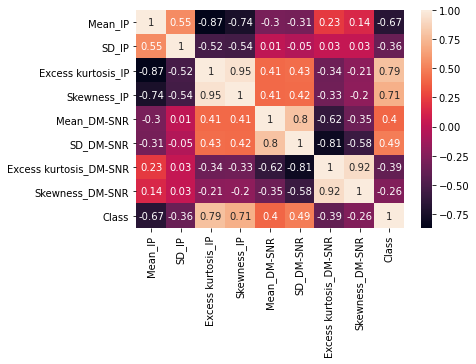

In [11]:
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'Mean_IP'}>,
        <AxesSubplot:title={'center':'SD_IP'}>,
        <AxesSubplot:title={'center':'Excess kurtosis_IP'}>],
       [<AxesSubplot:title={'center':'Skewness_IP'}>,
        <AxesSubplot:title={'center':'Mean_DM-SNR'}>,
        <AxesSubplot:title={'center':'SD_DM-SNR'}>],
       [<AxesSubplot:title={'center':'Excess kurtosis_DM-SNR'}>,
        <AxesSubplot:title={'center':'Skewness_DM-SNR'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

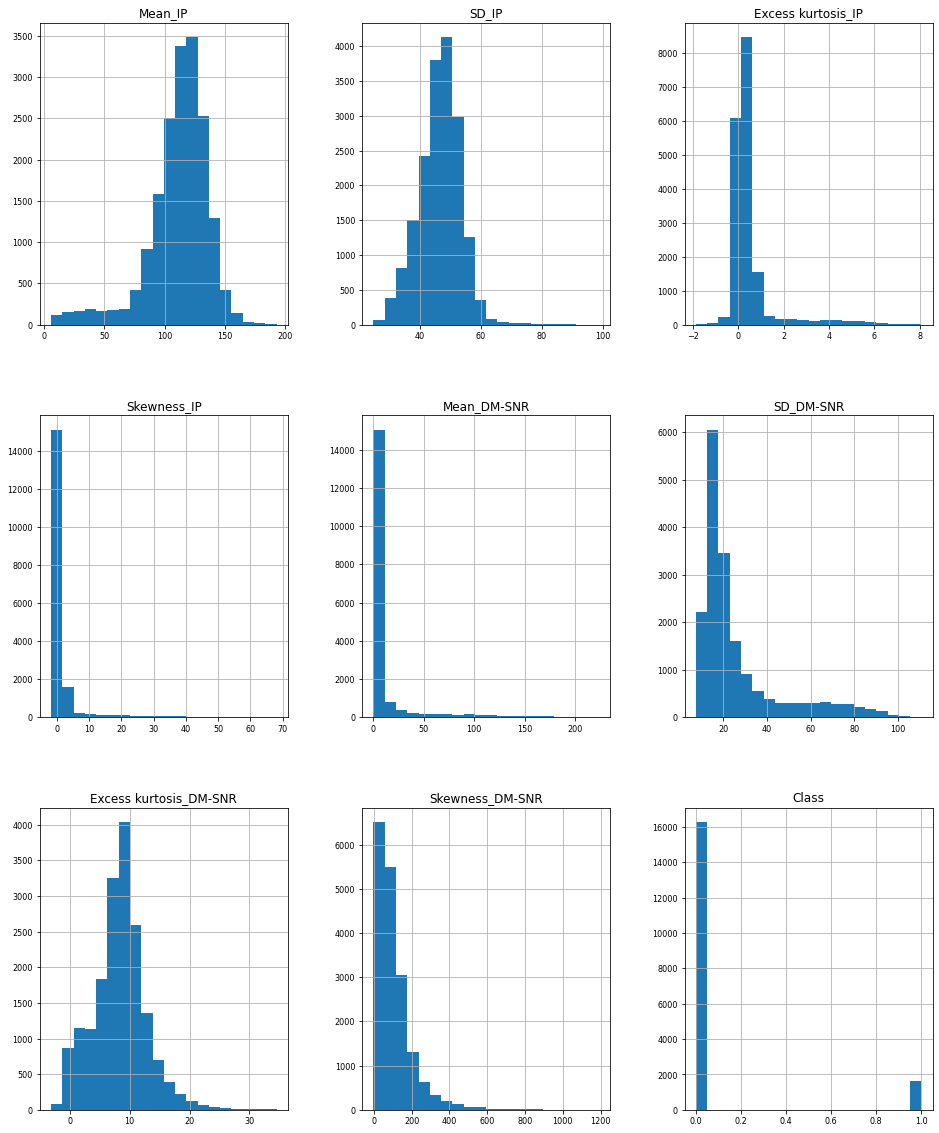

In [12]:
#plotting histogram of each column
df.hist(figsize=(16,20),bins=20,xlabelsize=8,ylabelsize=8)


Observation: Some columns have near normal distribution, while some show a right skew. Also, the positive samples are much lesser in number than the negative samples.

<AxesSubplot:xlabel='Class', ylabel='count'>

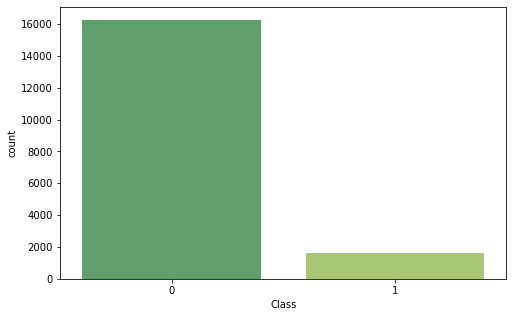

In [13]:
plt.figure(figsize=(8,5))
sns.countplot('Class',data=df,palette='summer')

Here we can see class 1 (Pulsar) is approximately just 10% of the total data.

#### Building the model

We will first build the model without normalization:

In [14]:
x= df.drop(columns = ['Class'], axis=1)
y=df['Class']

In [15]:
#We will perform an 80-20 split, so we give test_size = 0.2 or 20%
#remaining 80% is used for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [16]:
#Model building 
from sklearn.linear_model import LogisticRegression 


from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score 
# different performace measures for checking the goodness of model

In [17]:
ls=LogisticRegression(max_iter=500)

In [18]:
#Call the fit function to train the model
ls.fit(x_train,y_train.values.ravel())


LogisticRegression(max_iter=500)

In [19]:
yp=ls.predict(x_test)
#using the built model on test data for prediction
#store it in yp

#### Performance Measure

The dataset has ~90% class 0 and ~10% class 1. Thus, even if we get say 90% accuracy, we cannot be sure of the model performance. The model may simply be predicting the majority class!

In such cases, we should use precision and recall parameters. Precision = tp/(tp+fp) measures percentage of positive predictions that are actually positive. In this case, it would mean: Number of pulsars predicted that are actually pulsars
Recall =(tp/p) measures percentage of positive predictions identified from actual positive. In this context, it means, percentage of pulsars detected by the model as pulsars.

We desire a model which will have a high value of Recall . Next preference is higher precision.

In [20]:
# Importing the required function
from sklearn.metrics import classification_report

# Generating the report and printing the same
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3272
           1       0.91      0.79      0.85       308

    accuracy                           0.98      3580
   macro avg       0.95      0.89      0.92      3580
weighted avg       0.97      0.98      0.97      3580



In [21]:
#predicting targets based on the model built
train_predictions = ls.predict(x_train)
test_predictions = ls.predict(x_test)

In [22]:
# Importing the required function
from sklearn.metrics import confusion_matrix

# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train,train_predictions)

# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=ls.classes_,index=ls.classes_)

,0,1
0,12920,67
1,223,1108


In [23]:
#confusion matrix on the test data
test_conf_matrix = confusion_matrix(y_test,test_predictions)
pd.DataFrame(test_conf_matrix,columns=ls.classes_,index=ls.classes_)

,0,1
0,3249,23
1,64,244


We can see some false negative cases i.e. not predicting pulsar when there is a one. We want minimum false negative for our problem statement.

In [24]:
from sklearn import svm
#We will try SVM with linear kernel
svclassifier=svm.SVC(kernel="linear")
svclassifier.fit(x_train,y_train)
yp_s=svclassifier.predict(x_test)

In [25]:
# Importing the required function
from sklearn.metrics import classification_report

# Generating the report and printing the same
print(classification_report(y_test,yp_s))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3272
           1       0.93      0.80      0.86       308

    accuracy                           0.98      3580
   macro avg       0.95      0.90      0.92      3580
weighted avg       0.98      0.98      0.98      3580



In [26]:
#predicting targets based on the model built
train_predictions = svclassifier.predict(x_train)
test_predictions = svclassifier.predict(x_test)

In [27]:
#confusion matrix on the test data
test_conf_matrix = confusion_matrix(y_test,test_predictions)
pd.DataFrame(test_conf_matrix,columns=svclassifier.classes_,index=svclassifier.classes_)

,0,1
0,3252,20
1,61,247


In [28]:
# Importing the required function
from sklearn.metrics import confusion_matrix

# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train,train_predictions)

# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=svclassifier.classes_,index=svclassifier.classes_)

,0,1
0,12919,68
1,219,1112


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtcls=DecisionTreeClassifier(criterion="gini",max_depth=5)
dtcls.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [30]:
yp_dt=dtcls.predict(x_test)
#predicting test output using built model

In [31]:
# Importing the required function
from sklearn.metrics import classification_report

# Generating the report and printing the same
print(classification_report(y_test,yp_dt))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3272
           1       0.91      0.78      0.84       308

    accuracy                           0.97      3580
   macro avg       0.95      0.89      0.91      3580
weighted avg       0.97      0.97      0.97      3580



In [32]:
#predicting targets based on the model built
train_predictions = dtcls.predict(x_train)
test_predictions = dtcls.predict(x_test)

In [33]:
#confusion matrix on the test data
test_conf_matrix = confusion_matrix(y_test,test_predictions)
pd.DataFrame(test_conf_matrix,columns=dtcls.classes_,index=dtcls.classes_)

,0,1
0,3249,23
1,67,241


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=3)
knnc.fit(x_train, y_train)
knn_pred= knnc.predict(x_test)

In [35]:
#predicting targets based on the model built
train_predictions = knnc.predict(x_train)
test_predictions = knnc.predict(x_test)

In [36]:
#confusion matrix on the test data
test_conf_matrix = confusion_matrix(y_test,test_predictions)
pd.DataFrame(test_conf_matrix,columns=knnc.classes_,index=knnc.classes_)

,0,1
0,3225,47
1,77,231


In [37]:
# Importing the required function
from sklearn.metrics import classification_report

# Generating the report and printing the same
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3272
           1       0.83      0.75      0.79       308

    accuracy                           0.97      3580
   macro avg       0.90      0.87      0.88      3580
weighted avg       0.96      0.97      0.96      3580

